In [7]:
import bitcoin
prices = bitcoin.history(granularity=300)
prices.head()

,time,low,high,open,close,volume,date,percent
0,1516948380,11293.24,11300.00,11299.99,11293.24,0.304185,2018-01-26 07:33:00,-0.059735
1,1516948440,11282.13,11282.39,11282.39,11282.13,1.233112,2018-01-26 07:34:00,-0.002304
2,1516948500,11280.00,11282.13,11282.13,11280.01,1.031420,2018-01-26 07:35:00,-0.018791
3,1516948560,11280.00,11280.01,11280.00,11280.00,0.730190,2018-01-26 07:36:00,0.000000
4,1516948620,11280.00,11280.00,11280.00,11280.00,0.152012,2018-01-26 07:37:00,0.000000


In [2]:
prices.describe()

,time,low,high,open,close,volume,percent
count,3.510000e+02,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,1.516959e+09,10732.978917,10753.282108,10744.463875,10742.357436,4.977943,-0.018991
std,6.088152e+03,316.094355,308.616747,312.823303,311.657578,4.527756,0.250663
min,1.516948e+09,10305.000000,10368.010000,10338.760000,10339.410000,0.152012,-1.062389
25%,1.516954e+09,10500.500000,10525.300000,10513.440000,10516.380000,2.091682,-0.097765
50%,1.516959e+09,10572.620000,10601.780000,10582.860000,10580.010000,3.750577,0.000000
75%,1.516964e+09,11051.200000,11051.490000,11051.490000,11051.200000,6.265238,0.075530
max,1.516969e+09,11374.810000,11380.000000,11378.990000,11378.990000,37.087442,0.868517


In [3]:
prices.corr()

,time,low,high,open,close,volume,percent
time,1.000000,-0.859393,-0.871756,-0.866195,-0.864130,0.076482,0.060095
low,-0.859393,1.000000,0.997790,0.998116,0.998772,-0.291299,-0.034387
high,-0.871756,0.997790,1.000000,0.998657,0.998290,-0.270186,-0.046030
open,-0.866195,0.998116,0.998657,1.000000,0.996378,-0.279336,-0.084406
close,-0.864130,0.998772,0.998290,0.996378,1.000000,-0.283815,0.000611
volume,0.076482,-0.291299,-0.270186,-0.279336,-0.283815,1.000000,-0.038750
percent,0.060095,-0.034387,-0.046030,-0.084406,0.000611,-0.038750,1.000000


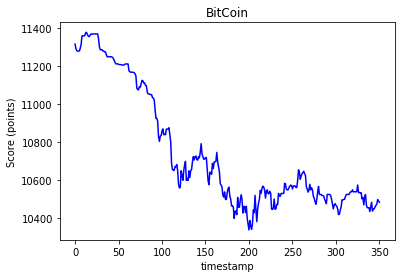

In [4]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.show()

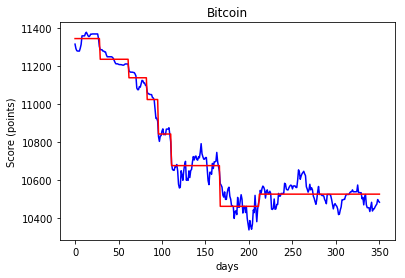

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

X = np.arange(len(prices)).reshape(-1, 1)
y = np.array(prices['close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

y_predict = tree_reg.predict(X)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.show()